In [149]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
%autoreload 2

In [165]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, int_norm, evaluation
from pylab import plot, show, savefig
from scipy import stats
#%pylab inline

In [291]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2016-05-12/"
path_sav = "/Volumes/friebelm/PhD/NU Plasma/Measurements/compilation/"
files_start = 4018
files_end = 4032


In [310]:
# cup configuration
#cup_config = cycle_Sb
cup_config = cycles2
# Isotopes used for Interference correction
corr_isotopes_1 = {"Cd" : "111", "Te" : "126"}
corr_isotopes_2 = {"Cd" : "111", "Te" : "125", "Xe" : "129"}
#corr_isotopes_2 = {}
corr_isotopes_Sb = {"Te": "125"}
# Mass Range of cup configuration
mass_range = cycles2_mass_range
#isotopes = [["111", "112", "114", "115", "116", "117", "118", "119", "122", "124"], ["117", "118", "119", "122", "124"]]
isotopes = [["111", "112", "113", "114", "115", "116", "117", "118", "119", "122", "124", "125"]]
#isotopes = [["116", "117", "118", "119", "122", "124"]]
isotope_column = ["111", "112", "113", "114", "115", "116", "117", "118", "119", "122", "124", "125"]
data_sample_column = [(i + "/" + "120") for i in isotope_column]

denom_isotope = "120"
norm_ratio = ["116","120"]
#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = False

blk_corr = False

In [299]:
columns_1 = ["cycle", "sample", "date", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)", "L4 (1)"]
columns_2 = ["cycle", "H8 (2)", "H7 (2)", "H6 (2)", "H5 (2)", "H4 (2)", "H3 (2)", "H2 (2)", "H1 (2)", "Ax (2)", "L1 (2)", "L2 (2)", "L3 (2)", "L4 (2)"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []
files_1 = range(files_start, files_end, 1)
for sample in files_1:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    df_zero_2 = pd.DataFrame(df_zero["cycle2"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero_1["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_2["cycle"] = df_zero_2.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_zero_2 = df_zero_2[columns_2]
    df_all = df_all.append(df_zero_1.merge(df_zero_2), ignore_index = True)
    #df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "Teflon blk" or sample_name == "4ml HDPE blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)
df_all
#for x in [123]:
#    sample_ls.remove(x)
#blk_ls = blk_ls[0::5]
#blk_ls.remove(4042)
df_all

,cycle,sample,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),...,H5 (2),H4 (2),H3 (2),H2 (2),H1 (2),Ax (2),L1 (2),L2 (2),L3 (2),L4 (2)
date,,,,,,,,,,,,,,,,,,,,,
2016-05-13 13:27:00,1,blank sol,0.000618,0.000465,0.003715,0.000831,0.002364,0.000743,0.002175,0.000041,...,0.000050,0.000022,0.000638,0.000051,0.000438,0.000111,0.003695,0.000860,0.002355,0.000748
2016-05-13 13:27:00,2,blank sol,0.000598,0.000427,0.003555,0.000789,0.002239,0.000689,0.002089,0.000043,...,0.000037,-0.000002,0.000636,0.000057,0.000453,0.000088,0.003758,0.000867,0.002403,0.000750
2016-05-13 13:27:00,3,blank sol,0.000540,0.000398,0.003311,0.000720,0.002062,0.000666,0.002010,0.000075,...,0.000036,0.000010,0.000785,0.000048,0.000603,0.000063,0.004492,0.001030,0.002921,0.000910
2016-05-13 13:27:00,4,blank sol,0.000731,0.000576,0.004376,0.000974,0.002856,0.000904,0.002473,0.000049,...,0.000046,0.000024,0.000684,0.000097,0.000512,0.000091,0.004006,0.000894,0.002541,0.000786
2016-05-13 13:27:00,5,blank sol,0.000638,0.000473,0.003761,0.000838,0.002390,0.000712,0.002208,0.000067,...,0.000032,0.000039,0.000595,0.000076,0.000487,0.000104,0.003624,0.000805,0.002301,0.000731
2016-05-13 13:27:00,6,blank sol,0.000635,0.000495,0.003693,0.000824,0.002349,0.000740,0.002185,0.000056,...,0.000032,0.000045,0.000503,0.000093,0.000360,0.000104,0.003038,0.000663,0.001883,0.000573
2016-05-13 13:27:00,7,blank sol,0.000459,0.000300,0.002891,0.000593,0.001759,0.000548,0.001848,0.000041,...,0.000013,0.000037,0.000489,0.000061,0.000386,0.000077,0.003137,0.000693,0.001949,0.000628
2016-05-13 13:27:00,8,blank sol,0.000591,0.000436,0.003601,0.000804,0.002268,0.000701,0.002130,0.000063,...,0.000030,0.000002,0.000750,0.000051,0.000551,0.000087,0.004255,0.000978,0.002733,0.000880
2016-05-13 13:27:00,9,blank sol,0.000632,0.000497,0.003736,0.000799,0.002365,0.000730,0.002206,0.000067,...,0.000040,-0.000002,0.000547,0.000078,0.000373,0.000098,0.003215,0.000698,0.002002,0.000630


In [311]:
files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    # arbitrary blank positions
    blk1 = [item for item in blk_ls if item < sample]
    blk2 = [item for item in blk_ls if item > sample]
    blk1 = blk1[-1]
    blk2 = blk2[0]
    blk_corr_sample = True
    
    # blank measurement surrounds sample
    #if ((sample-1) in blk_ls) and ((sample+1) in blk_ls):
    #    blk1 = sample-1
    #    blk2 = sample+1
    #    blk_corr_sample = True
    #else:
    #    blk_corr_sample = False
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
        new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    data_sample = new_corr.internal_norm_1(norm_ratio, denom_isotope, iter_beta)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)

In [312]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_internal_sub["Cd/Sn"] = (df_internal_norm["111"]/12.722)/(df_internal_norm["118"]/24.223)
df_internal_sub["Te/Sn"] = (df_internal_norm["125"]/7.0509)/(df_internal_norm["118"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [313]:
df_internal_norm

,111/120,112/120,113/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,...,114,117,116,111,125,113,112,124,119,118
date,,,,,,,,,,,,,,,,,,,,,
2016-05-13 13:37:00,0.000080,0.029819,4.629669e-07,0.020198,0.010359,0.446,0.235294,0.742942,0.263470,0.142087,...,0.325737,3.920644,7.331482,NaN,0.000059,NaN,0.465872,3.245539,4.510033,12.547807
2016-05-13 13:37:00,0.000084,0.029823,1.448186e-06,0.020194,0.010357,NaN,0.235310,0.742971,0.263465,0.142091,...,0.321779,3.872525,7.240903,0.001269,0.000039,0.001251,0.460260,3.205551,4.454477,12.393701
2016-05-13 13:37:00,0.000086,0.029816,1.511331e-06,0.020189,0.010359,NaN,0.235301,0.742975,0.263473,0.142093,...,0.314696,3.786534,7.080818,0.001270,0.000051,0.001252,0.450141,3.133558,4.355356,12.118346
2016-05-13 13:37:00,0.000085,0.029813,2.804684e-06,0.020192,0.010361,0.446,0.235293,0.742923,NaN,0.142089,...,0.316526,3.808564,7.122196,0.001261,0.000070,0.001263,0.452669,3.152381,4.381148,12.188518
2016-05-13 13:37:00,0.000082,0.029821,3.459764e-06,0.020191,0.010359,NaN,0.235321,0.742961,0.263467,0.142087,...,0.330316,3.976562,7.435236,0.001276,0.000079,0.001290,0.472558,3.291240,4.573797,12.725697
2016-05-13 13:37:00,0.000090,0.029819,3.432144e-06,0.020190,0.010362,0.446,0.235310,0.742951,0.263469,0.142099,...,0.318370,3.829616,7.160783,NaN,0.000064,0.001354,0.455277,3.170145,4.405119,12.255979
2016-05-13 13:37:00,0.000084,0.029813,3.248249e-06,0.020190,0.010360,0.446,0.235300,0.742934,0.263479,0.142096,...,0.325370,3.915801,7.322418,0.001287,0.000061,0.001297,0.465352,3.241186,4.504363,12.531687
2016-05-13 13:37:00,0.000081,0.029819,4.584782e-06,0.020198,0.010360,0.446,0.235307,0.742932,0.263466,0.142089,...,0.332927,4.006931,7.492322,0.001272,0.000048,0.001305,0.476098,3.317069,4.609146,12.823360
2016-05-13 13:37:00,0.000084,0.029820,4.322221e-06,0.020194,0.010359,0.446,0.235312,0.742954,0.263461,0.142095,...,0.322215,3.877809,7.250805,0.001268,0.000062,0.001295,0.460859,3.209705,4.460360,12.410113


In [314]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SE])
df_internal_norm_mean["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
#df_internal_norm_mean = df_internal_norm_mean[1:]
#df_internal_norm_mean = df_internal_norm_mean.drop(datetime.strptime("20150310 23:59", "%Y%m%d %H:%M"))
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:]
df_internal_norm_mean_sd
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

111/120                 112/120                \
                         mean            SE      mean            SE   
date                                                                  
2016-05-13 13:37:00  0.000084  1.409895e-07  0.029817  1.493325e-07   
2016-05-13 14:55:00  0.000387  1.078064e-06  0.029805  1.419642e-06   
2016-05-13 16:00:00  0.000357  5.612445e-07  0.029819  8.243930e-07   
2016-05-13 16:11:00  0.000392  6.120307e-07  0.029809  1.409513e-06   
2016-05-13 16:24:00  0.000398  1.170623e-06  0.029799  8.825059e-07   
2016-05-13 16:41:00  0.000334  4.038399e-07  0.029806  6.008393e-07   
2016-05-13 16:53:00  0.000292  7.562751e-07  0.029814  5.178213e-07   
2016-05-13 17:09:00  0.000281  4.645944e-07  0.029813  1.023789e-06   
2016-05-13 17:20:00  0.000354  5.178600e-07  0.029815  6.507889e-07   

                          113/120                 114/120                \
                             mean            SE      mean            SE   
date                                                                      
2016-05-13 13:37:00  3.422197e-06  5.750082e-08  0.020193  1.384454e-07   
2016-05-13 14:55:00  2.145219e-06  9.205660e-07  0.020192  1.345877e-06   
2016-05-13 16:00:00  4.860331e-06  5.014967e-07  0.020185  9.209487e-07   
2016-05-13 16:11:00  4.905516e-06  6.190933e-07  0.020193  1.701064e-06   
2016-05-13 16:24:00 -8.172174e-06  3.985229e-07  0.020171  1.224426e-06   
2016-05-13 16:41:00  4.766152e-07  3.647870e-07  0.020184  7.226118e-07   
2016-05-13 16:53:00  1.691639e-06  4.309172e-07  0.020186  7.826260e-07   
2016-05-13 17:09:00 -1.403564e-06  5.914927e-07  0.020184  6.781093e-07   
2016-05-13 17:20:00  4.310367e-06  5.685270e-07  0.020188  1.573863e-06   

                      115/120                      ...              122  \
                         mean            SE        ...               SE   
date                                               ...                    
2016-05-13 13:37:00  0.010360  7.948882e-08        ...         0.002793   
2016-05-13 14:55:00  0.010363  4.350907e-07        ...         0.001116   
2016-05-13 16:00:00  0.010366  6.290516e-07        ...         0.000341   
2016-05-13 16:11:00  0.010364  5.633911e-07        ...         0.000371   
2016-05-13 16:24:00  0.010362  3.689801e-07        ...         0.000626   
2016-05-13 16:41:00  0.010364  1.392623e-07        ...         0.000429   
2016-05-13 16:53:00  0.010365  3.311398e-07        ...         0.000698   
2016-05-13 17:09:00  0.010363  3.693049e-07        ...         0.000428   
2016-05-13 17:20:00  0.010365  3.045231e-07        ...         0.000443   

                          124                 125                   Cd/Sn  \
                         mean        SE      mean            SE      mean   
date                                                                        
2016-05-13 13:37:00  3.224312  0.003586  0.000072  9.188307e-07  0.000196   
2016-05-13 14:55:00  0.680131  0.001435  0.000042  1.268648e-06  0.000899   
2016-05-13 16:00:00  0.736192  0.000441  0.000027  1.417938e-06  0.000828   
2016-05-13 16:11:00  0.682758  0.000475  0.000031  1.784776e-06  0.000911   
2016-05-13 16:24:00  0.687893  0.000802  0.000023  1.010040e-06  0.000918   
2016-05-13 16:41:00  0.814635  0.000548  0.000027  1.606368e-06  0.000776   
2016-05-13 16:53:00  0.894481  0.000901  0.000047  1.453557e-06  0.000679   
2016-05-13 17:09:00  0.951456  0.000545  0.000051  1.274799e-06  0.000654   
2016-05-13 17:20:00  0.725726  0.000569  0.000037  1.287133e-06  0.000823   

                                      Te/Sn                          sample  
                               SE      mean            SE                    
date                                                                         
2016-05-13 13:37:00  3.068361e-07  0.000020  2.510235e-07       NIST 200ppb  
2016-05-13 14:55:00  2.500396e-06  0.000055  1.675269e-06        NIST 50ppb  
2016-05-13 16:00:00  1.303685e-06  0.000033  1.71897

In [21]:
#no_corr = pd.DataFrame(df_internal_norm_mean)
no_corr

,111/118,112/118,114/118,115/118,116/118,117/118,119/118,120/118,122/118,124/118,...,117,118,119,120,122,124,125,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2016-05-12 20:02:00,0.000132,0.040133,0.027174,0.013946,0.600313,0.316715,0.354614,1.345976,0.19125,0.239022,...,4.177552,13.370737,4.805966,18.487020,2.697259,3.459906,0.000146,0.000228,0.000037,NIST 200ppb
2016-05-12 20:26:00,0.000073,0.040136,0.027178,0.013945,0.600322,0.316718,0.354618,1.345923,0.19125,0.239019,...,7.594534,24.305639,8.736026,33.601210,4.902109,6.287446,0.000281,0.000127,0.000040,NIST 350ppb
2016-05-12 20:50:00,0.000131,0.040137,0.027177,0.013948,0.600330,0.316727,0.354622,1.345995,0.19125,0.239014,...,4.234292,13.550494,4.870214,18.732175,2.732469,3.504299,0.000153,0.000226,0.000039,NIST 200ppb
2016-05-12 21:04:00,0.000076,0.040136,0.027177,0.013946,0.600323,0.316727,0.354623,1.345941,0.19125,0.239013,...,7.601546,24.320126,8.738759,33.601825,4.899268,6.280053,0.000256,0.000131,0.000036,NIST 350ppb
2016-05-12 21:18:00,0.000136,0.040135,0.027176,0.013948,0.600336,0.316728,0.354632,1.346006,0.19125,0.239012,...,4.171845,13.347491,4.796265,18.443135,2.689055,3.447046,0.000148,0.000236,0.000038,NIST 200ppb
2016-05-12 21:31:00,0.000076,0.040139,0.027178,0.013947,0.600339,0.316732,0.354629,1.345957,0.19125,0.239008,...,7.545757,24.142227,8.675339,33.359149,4.864220,6.235497,0.000248,0.000131,0.000035,NIST 350ppb
2016-05-12 21:45:00,0.000135,0.040138,0.027180,0.013948,0.600339,0.316735,0.354630,1.346021,0.19125,0.239011,...,4.168346,13.336944,4.792822,18.431519,2.687745,3.445851,0.000150,0.000231,0.000039,NIST 200ppb


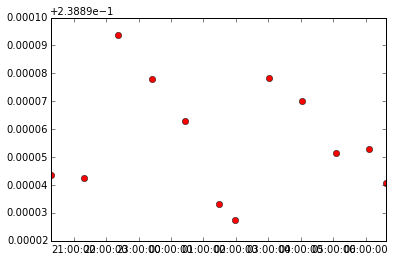

In [30]:
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 200ppb"]
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
dataplot = plot(plot_Nist.index, plot_Nist["124/118"], "ro")
#dataplot = plot(plot_Nist.index, plot_Nist["120"], "ro")
show(dataplot)

In [30]:
sub_index = df_internal_norm_mean[(df_internal_norm_mean["sample"].shift(1) == df_internal_norm_mean["sample"].shift(-1)) & (df_internal_norm_mean["sample"].shift(1) == "NIST 100ppb")].index
#corr_values = df_internal_norm_mean[(df_external_norm_mean >= 0.74289)]
#corr_values = df_internal_norm_mean[:"20150110 10:00"]
corr_values = df_internal_norm_mean[df_internal_norm_mean["118"] >= 1]
#corr_values = df_internal_norm_mean
sample = corr_values["sample"]
std_mean = corr_values[(corr_values["sample"] == "NIST 100ppb")].mean()
new = corr_values[corr_values.columns[corr_values.dtypes != 'object']]

#std_mean["112/120", "114/120", "115/120", "117/120", "118/120", "119/120", "122/120", "124/120"] = [0.029823, 0.020189, 0.010372, 0.235299, 0.742923, 0.263443, 0.142078, 0.177546]
#print std_mean
#epsilon =  ((new / std_mean)-1)*10000
#new["sample"] = sample
epsilon_NIST =  ((new / ((new.shift(1) + new.shift(-1))/2))-1)*10000
epsilon_2 = ((new / ((new.shift(2) + new.shift(-2))/2))-1)*10000
epsilon_NIST["sample"] = sample
epsilon_2["sample"] = sample

epsilon_NIST = epsilon_NIST[new.index.isin(sub_index)]
#new[new.sample != "NIST 100ppb"]
epsilon_2 = epsilon_2[epsilon_2["sample"] == "NIST 100ppb"]
epsilon_comp = epsilon_NIST.append(epsilon_2, ignore_index=True)
epsilon_comp

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,112,...,118,119,120,122,124,111,125,Cd/Sn,Te/Sn,sample
0,-0.157546,0.806052,1.186381,0.000000e+00,-0.000613,0.140350,0.046603,-0.113290,-0.175277,11.886915,...,16.497948,16.643634,16.848481,17.279355,17.730492,-634.145915,1718.136177,-656.042448,1678.575754,NIST 100ppb
1,0.010613,-0.354686,-1.095403,0.000000e+00,0.013065,-0.020277,0.079975,0.071490,0.196824,11.832126,...,8.823016,8.688158,8.300578,7.854578,7.451952,341.428374,779.276502,251.130324,664.129446,NIST 100ppb
2,-0.598571,0.009724,0.658624,0.000000e+00,0.015630,-0.092740,-0.097062,0.153480,0.174857,22.387021,...,25.694485,25.753448,25.991219,26.291009,26.490910,-517.084093,-274.772940,-379.206116,-138.045429,NIST 100ppb
3,0.845987,-0.113172,-0.654596,-1.110223e-12,-0.035282,0.136354,0.096646,-0.301184,-0.337102,-48.792192,...,-52.886586,-52.882197,-52.920701,-53.064389,-52.957223,933.930294,866.074326,812.381916,764.743603,NIST 100ppb
4,-0.548265,0.199578,1.131110,2.220446e-12,0.115269,-0.102919,-0.078537,0.013242,-0.077855,56.906331,...,56.091067,55.649067,55.264889,54.354275,53.316951,-435.318737,-403.932591,-375.554137,-341.677024,NIST 100ppb
5,0.069817,-0.302980,-1.413471,-2.220446e-12,-0.090760,0.010059,-0.020093,0.207694,0.299219,13.964024,...,19.514941,20.454107,21.407331,23.441364,25.373196,142.052912,47.886972,96.732195,-25.737741,NIST 100ppb
6,0.249840,0.242931,1.152702,2.220446e-12,0.004797,0.023764,-0.011071,-0.133584,-0.223587,-137.836372,...,-141.497948,-142.080623,-142.611770,-143.766531,-144.890363,-117.768006,17.674045,0.364721,159.933212,NIST 100ppb
7,-0.809343,-0.719147,0.163036,-1.110223e-12,0.025041,-0.024558,0.158870,0.141183,0.094350,33.208135,...,33.556661,33.860959,33.821631,34.169361,34.398411,347.805320,165.335120,311.080829,129.689507,NIST 100ppb
8,0.760937,0.482992,-0.902214,-1.110223e-12,-0.000929,0.000572,-0.180552,-0.161087,-0.058962,38.800691,...,38.958018,38.566301,38.530380,37.947098,37.530856,-545.257892,-156.603569,-612.314338,-232.807570,NIST 100ppb
9,-0.388701,0.091110,0.211089,2.220446e-12,-0.074730,0.022505,0.085804,0.091216,0.081024,1.278031,...,0.753381,0.876451,0.858207,1.111050,1.281943,348.627108,461.805195,412.411240,527.509505,NIST 100ppb


In [31]:
def SD2(x):
    SD2 = np.std(x) * 2
    return SD2

epsilon = epsilon_comp.drop(["111", "125", "112", "114", "115", "116", "117", "118", "119", "120", "122", "124", "Cd/Sn", "Te/Sn"], axis = 1)
#epsilon = epsilon.drop(["118"], axis = 1)
epsilon_sum = np.round(epsilon.groupby("sample").agg([np.mean, SD2]), decimals=2)
epsilon_sum

112/120       114/120       115/120       116/120     117/120  \
                mean   SD2    mean   SD2    mean   SD2    mean SD2    mean   
sample                                                                       
NIST 100ppb    -0.01  1.70    0.01  2.57   -0.29  2.75       0   0   -0.01   
SPEX1 100ppb   -0.65  0.59   -0.56  0.80    7.20  2.68      -0   0    0.03   

                   118/120       119/120       122/120       124/120        
               SD2    mean   SD2    mean   SD2    mean   SD2    mean   SD2  
sample                                                                      
NIST 100ppb   0.15   -0.03  0.18   -0.02  0.22   -0.01  0.34    0.04  0.61  
SPEX1 100ppb  0.17    0.05  0.09   -0.02  0.12   -0.11  0.19   -0.15  0.19

In [29]:
x = range(1, len(epsilon_sum.index)+1)
errorbar(epsilon_sum["112/118"]["mean"], x, xerr = epsilon_sum["112/118"]["SD2"], ls='none', marker="o")
title("all standards")
xlim([-4, 4])
ylim([0.5, 2.5])
yticks(x, epsilon_sum.index, size='small', rotation=0)
ylabel(r'$\mathregular{\epsilon^{112}}$Sn$_{SPEX}$')
#savefig(path_sav+"epsilon_124_stds.pdf", bbox_inches='tight')

NameError: name 'errorbar' is not defined

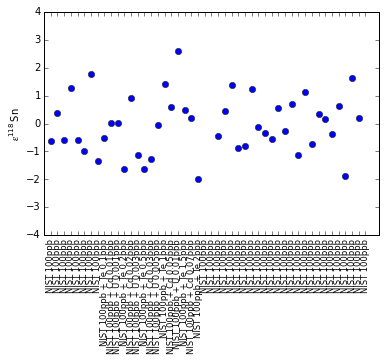

In [133]:
x = range(1, len(epsilon_comp["sample"])+1)
plot(x, epsilon_comp["112/120"], marker="o", ls="none")
ylim([-4, 4])
xticks(x, epsilon_comp["sample"], size='small', rotation=90)
ylabel(r'$\mathregular{\epsilon^{118}}$Sn')
#savefig(path+"epsilon_119.pdf", bbox_inches='tight')

In [13]:
df_all.to_csv(path + "Sn_H8_L4_2_cycles_NU_Signals_zero_corr.csv", mode='a', header=False)

In [203]:
df_internal_norm.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_116_120_no_bdg_corr_all.csv", mode='w', header=True)

In [315]:
df_internal_norm_mean_sd.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_116_120_mad_no_bgd_50ppb.csv", mode='w', header=True)

In [1226]:
df_std.to_csv(path_sav + "All_standards_internal_norm_mean.csv")

In [986]:
df_all_mean_1 = pd.read_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_mean.csv")

In [987]:
df_all_mean_2 = pd.read_csv(path_sav + "Sn_H8_L4_2_cycles_internal_norm_mean.csv")

In [1088]:
df_mean_all = df_all_mean_1.append(df_all_mean_2)

In [30]:
#old Cd/Sn & Te/Sn extraction - doesn't include bgd corr
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_all_sub = df_all[(df_all["sample"] != "blank sol") & (df_all["sample"] != "SQ") & (df_all["sample"] != "teflon blank")]
df_internal_sub["111"] = df_all_sub["L3 (1)"]
df_internal_sub["125"] = df_all_sub["H5 (2)"]
df_internal_sub["Cd/Sn"] = (df_all_sub["L3 (1)"]/12.722)/(df_all_sub["H4 (1)"]/24.223)
df_internal_sub["Te/Sn"] = (df_all_sub["H5 (2)"]/7.0509)/(df_all_sub["H4 (1)"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [1089]:
df_mean_all = df_mean_all[2:]
df_mean_all.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df_mean_all = df_mean_all[["Date", "112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118","sample"]]
df_mean_all = df_mean_all.set_index("Date") 

In [1182]:
df_std = df_mean_all[(df_mean_all["sample"] == "SPEX1 100ppb") | (df_mean_all["sample"] == "SPEX 100ppb") | (df_mean_all["sample"] == "NIST 100ppb")]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 20:49:00,0.0298238495726,0.0201845997439,0.0103681594438,0.446,0.235295696368,0.742939518097,0.263445942562,0.142086185109,0.177571556759,10.1619395381,SPEX1 100ppb
2014-10-07 21:07:00,0.0298270855009,0.0201887834143,0.0103664239291,0.446,0.235295260593,0.742937654621,0.263447680516,0.14208571056,0.177573088542,10.2834847296,SPEX1 100ppb
2014-10-07 21:29:00,0.0298241010738,0.0201850728708,0.0103667030734,0.446,0.235295046713,0.742937732217,0.263449417694,0.142085954225,0.17757007419,10.0068814188,SPEX1 100ppb
2014-10-07 21:46:00,0.0298269719657,0.0201827454973,0.0103676568054,0.446,0.235297077525,0.742936157145,0.263450048386,0.142089277895,0.177573191934,10.1732362802,SPEX1 100ppb
2014-11-18 18:22:00,0.0298319477344,0.0201968060654,0.0103609914838,0.446,0.235308007067,0.74295144542,0.263456437295,0.142073025422,0.17753393783,11.9205622223,NIST 100ppb
2014-11-18 18:27:00,0.0298302415426,0.0202014506204,0.0103609667001,0.446,0.235304600881,0.742949759778,0.263451222795,0.142074064497,0.177531032284,11.8435340427,NIST 100ppb
2014-11-18 18:31:00,0.029834566445,0.0202024281122,0.0103608586407,0.446,0.235309236679,0.742955467382,0.263452936054,0.142073215452,0.177533064574,11.3634385069,NIST 100ppb
2014-11-18 18:36:00,0.0298236482085,0.0201946006554,0.0103617565758,0.446,0.235308318118,0.742946848523,0.263449990275,0.142074569672,0.177530832831,11.5416992302,NIST 100ppb
2014-11-18 18:40:00,0.0298227478429,0.0201921659888,0.0103615705949,0.446,0.235307461611,0.742950591745,0.263450041891,0.142075223065,0.177536326791,11.6314409578,NIST 100ppb


In [1183]:
df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]] = df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]].astype(float)
df_std.index = df_std.index.astype(datetime64)
df_std = df_std[(df_std.index < pd.Timestamp('2015-03-10')) | (df_std.index > pd.Timestamp('2015-03-12'))]
df_std = df_std[(df_std.index < pd.Timestamp('2014-11-29 18:25:00')) | (df_std.index > pd.Timestamp('2014-11-29 20:27:00'))]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 18:49:00,0.029824,0.020185,0.010368,0.446,0.235296,0.742940,0.263446,0.142086,0.177572,10.161940,SPEX1 100ppb
2014-10-07 19:07:00,0.029827,0.020189,0.010366,0.446,0.235295,0.742938,0.263448,0.142086,0.177573,10.283485,SPEX1 100ppb
2014-10-07 19:29:00,0.029824,0.020185,0.010367,0.446,0.235295,0.742938,0.263449,0.142086,0.177570,10.006881,SPEX1 100ppb
2014-10-07 19:46:00,0.029827,0.020183,0.010368,0.446,0.235297,0.742936,0.263450,0.142089,0.177573,10.173236,SPEX1 100ppb
2014-11-18 17:22:00,0.029832,0.020197,0.010361,0.446,0.235308,0.742951,0.263456,0.142073,0.177534,11.920562,NIST 100ppb
2014-11-18 17:27:00,0.029830,0.020201,0.010361,0.446,0.235305,0.742950,0.263451,0.142074,0.177531,11.843534,NIST 100ppb
2014-11-18 17:31:00,0.029835,0.020202,0.010361,0.446,0.235309,0.742955,0.263453,0.142073,0.177533,11.363439,NIST 100ppb
2014-11-18 17:36:00,0.029824,0.020195,0.010362,0.446,0.235308,0.742947,0.263450,0.142075,0.177531,11.541699,NIST 100ppb
2014-11-18 17:40:00,0.029823,0.020192,0.010362,0.446,0.235307,0.742951,0.263450,0.142075,0.177536,11.631441,NIST 100ppb


In [1184]:
df_std = df_std[(df_std["118"] > 5) & (df_std["118/120"] > 0.7428)]
for i in df_std.index[df_std["sample"] == "SPEX1 100ppb"]:
    df_std.ix[i, "sample"] = "SPEX 100ppb"

In [1220]:
sample = df_std["sample"]
std_mean = df_std[(df_std["sample"] == "SPEX 100ppb")].mean()
new = df_std[df_std.columns[df_std.dtypes != 'object']]
epsilon =  ((new / std_mean)-1)*10000
epsilon["sample"] = sample
epsilon
epsilon[(epsilon["118/120"] > 0.4) | (epsilon["118/120"] < -0.4)]

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-11-18 18:54:00,-1.295126,-1.053575,1.608025,1.998401e-11,-1.180555,-0.463371,-0.356364,0.722133,2.010156,1309.494419,SPEX 100ppb
2014-12-06 22:37:00,-4.936059,-7.445774,1.331682,1.998401e-11,0.786625,0.539985,1.003885,0.222717,0.767402,-1614.119882,SPEX 100ppb
2014-12-06 22:52:00,-1.620072,-3.896472,0.536870,1.998401e-11,0.533814,0.527568,1.004705,0.469725,1.664357,-1804.778746,SPEX 100ppb
2014-12-06 23:08:00,-2.641746,-4.386719,2.125820,1.998401e-11,0.522416,0.475452,0.892735,0.462190,1.555222,-1848.039153,SPEX 100ppb
2014-12-06 23:23:00,-3.243182,-3.908338,-0.299309,1.998401e-11,0.613841,0.489401,0.951723,0.466426,1.660720,-1728.263406,SPEX 100ppb
2014-12-06 23:39:00,-3.174104,-5.626922,2.187946,1.998401e-11,0.711496,0.500329,0.913301,0.302836,1.500547,-1512.382276,SPEX 100ppb
2014-12-06 23:54:00,-2.499252,-3.686348,3.196847,1.998401e-11,0.532245,0.565307,0.943385,0.268384,1.570411,-1442.654967,SPEX 100ppb
2014-12-07 00:09:00,-3.167063,-4.997893,0.608021,1.998401e-11,0.745353,0.520016,1.039127,0.455542,1.559710,-1523.698889,SPEX 100ppb
2014-12-07 00:25:00,-2.027759,-4.105014,2.820000,1.998401e-11,0.605650,0.507195,0.913818,0.470145,1.538801,-1719.373397,SPEX 100ppb


In [1222]:
lee = pd.DataFrame({"112/120" : pd.Series(0.029812), "114/120" : pd.Series(0.020195), "115/120": pd.Series(0.010366), "116/120": pd.Series(0.4460), "117/120" : pd.Series(0.235313), "118/120" : pd.Series(0.742935), "119/120" : pd.Series(0.263430), "122/120" : pd.Series(0.142086), "124/120" : pd.Series(0.177588)})
epsilon_lee = ((lee / std_mean[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]])-1)*10000
epsilon_lee["sample"] = "Lee et al. (1995)"
epsilon_lee

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,sample
0,-4.252887,1.76055,-2.836398,1.998401e-11,0.6046,0.052729,-0.550984,0.411199,1.946529,Lee et al. (1995)
